Importing essential libraries for data manipulation, visualization, and machine learning tasks such as model evaluation and preprocessing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split

Loading the dataset from the specified file path into a pandas DataFrame and displaying the first few rows for an initial inspection

In [4]:
data = pd.read_csv(r'C:\Users\marco\Downloads\NoteBooks DMML\MY_PROJECTS\fraud_detection_project\creditcard_2023.csv')
data.head()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


Displaying a summary of the dataset, including column names, data types, and non-null value counts for each column.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Checking for missing values in each column of the dataset by summing up the number of null entries.

In [3]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Separating the features (X) and the target variable (y) for the dataset. Unnecessary columns like 'id' and 'Class' are dropped from X, while Class is assigned to y

In [10]:
X = data.drop(['id', 'Class'], axis=1, errors='ignore')
y = data['Class']

Spliting the dataset into training and test sets, with 80% of the data used for training and 20% for testing. 

In [12]:
X_training, X_test, Y_training, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Normalizing the features, using a the StandardScaler, by removing the mean and scaling to unit variance. The training and test data are then scaled separately to prepare them for model training and evaluation.

In [14]:
scaler = StandardScaler()
X_training_scaled = scaler.fit_transform(X_training)
X_test_scaled = scaler.fit_transform(X_test)

Displaying the class distribution in the training labels (Y_training) as proportions in order to identify any eventual class imbalance in the target variable.

In [16]:
print(pd.Series(Y_training).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


Initializing a RandomForestClassifier model with specified hyperparameters: 100 decision trees (n_estimators=100), a maximum tree depth of 10 (max_depth=10), and a minimum of 5 samples required to split an internal node (min_samples_split=5). 

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)

Performing 5-fold cross-validation on the RandomForestClassifier model using the scaled training data. The scoring='f1' argument ensures evaluation based on the F1 score. This method splits the data into 5 subsets and provides a more reliable performance estimate. It tests how well the model generalizes.

In [ ]:
cv_scores = cross_val_score(rf_model, X_training_scaled, Y_training, cv=5, scoring='f1')



The result list shows the F1 scores for each of the 5 folds. These scores represent the model's performance on different subsets of the training data, and a higher F1 score indicates better balance between precision and recall.
All the scores are very close to 0.985, indicating that the model performs consistently well across different subsets of the training data.

In [21]:
print('cross validation f1 scores', cv_scores)

cross validation f1 scores [0.98470321 0.98650077 0.98473333 0.98425733 0.98384955]


In [24]:
print('average f1 score', np.mean(cv_scores))


average f1 score 0.984808837480464


trainining of the RandomForestClassifier (rf_model) on the scaled training data (X_training_scaled) and the target labels (Y_training). The training step is essential for the model to make predictions on unseen data

In [26]:
rf_model.fit(X_training_scaled, Y_training)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

This line uses the trained rf_model to make predictions on the scaled test data (X_test_scaled). The predict() function outputs the predicted class labels for each instance in the test set, based on the patterns the model learned during training

In [27]:
y_pred = rf_model.predict(X_test_scaled)

classification report, which includes key metrics such as precision, recall, F1 score, and support for each class in the test set (Y_test). These metrics help evaluate the model's performance in predicting both classes. The model demonstrates excellent performance, with an accuracy of 99% and high precision, recall, and F1-score for both classes, indicating strong ability to detect both fraudulent and non-fraudulent transactions

In [29]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



confusion matrix by comparing the true labels (Y_test) with the predicted labels (y_pred). It helps evaluating the performance of a classification algorithm by showing the counts of true positives, true negatives, false positives, and false negatives

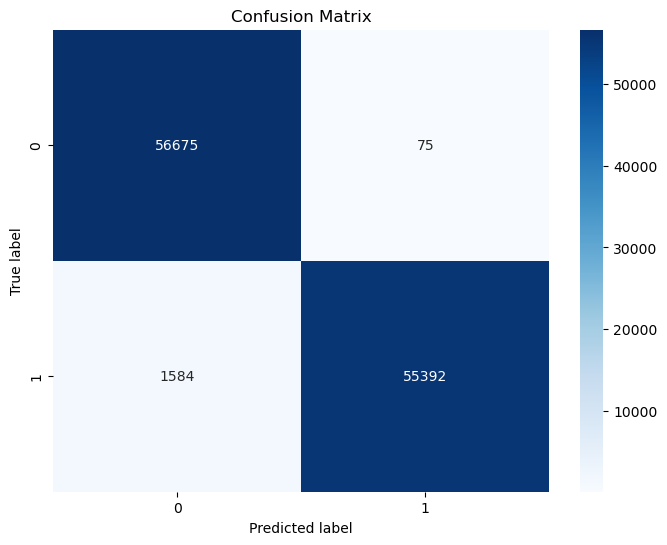

In [ ]:
plt.figure(figsize=(8,6))
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

Calculating the feature importance using the trained RandomForestClassifier model (rf_model) in order to see how much each feature contributes to the model's decisions. This allow us to understand which features have the most impact on the model's predictions

In [34]:
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature':X.columns,
    'Importance': importance
}).sort_values('Importance', ascending=False)

As we can see, those are the 5 most impactful features on the model's predictions.

In [35]:
feature_imp.head()

,Feature,Importance
9,V10,0.171750
3,V4,0.159210
13,V14,0.145847
11,V12,0.114395
10,V11,0.089935


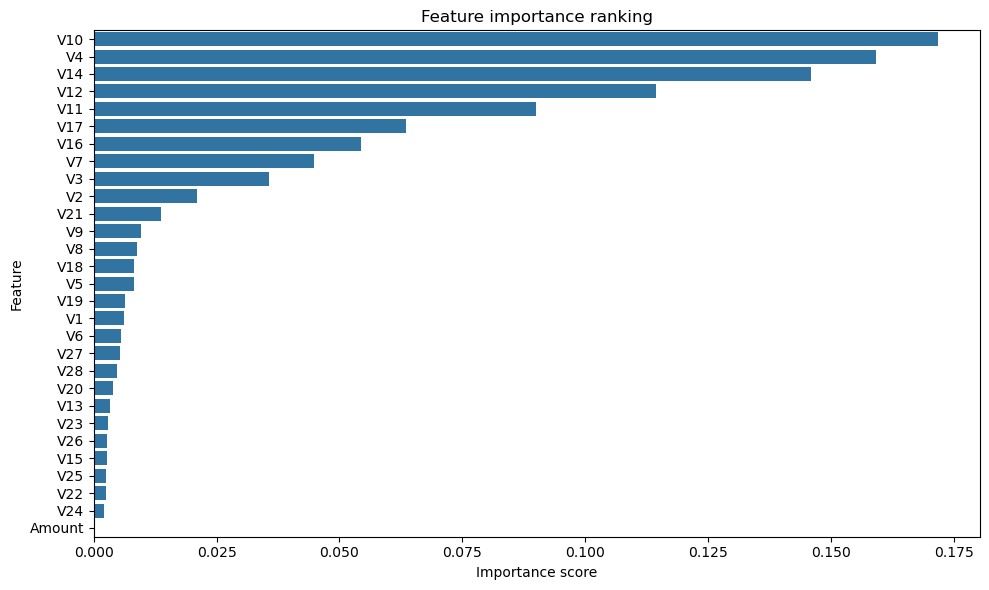

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(feature_imp, x='Importance', y='Feature')
plt.title('Feature importance ranking')
plt.xlabel('Importance score')
plt.tight_layout()
plt.show()

We calculate the correlation matrix of the features in X, showing the relationships between each pair of variables

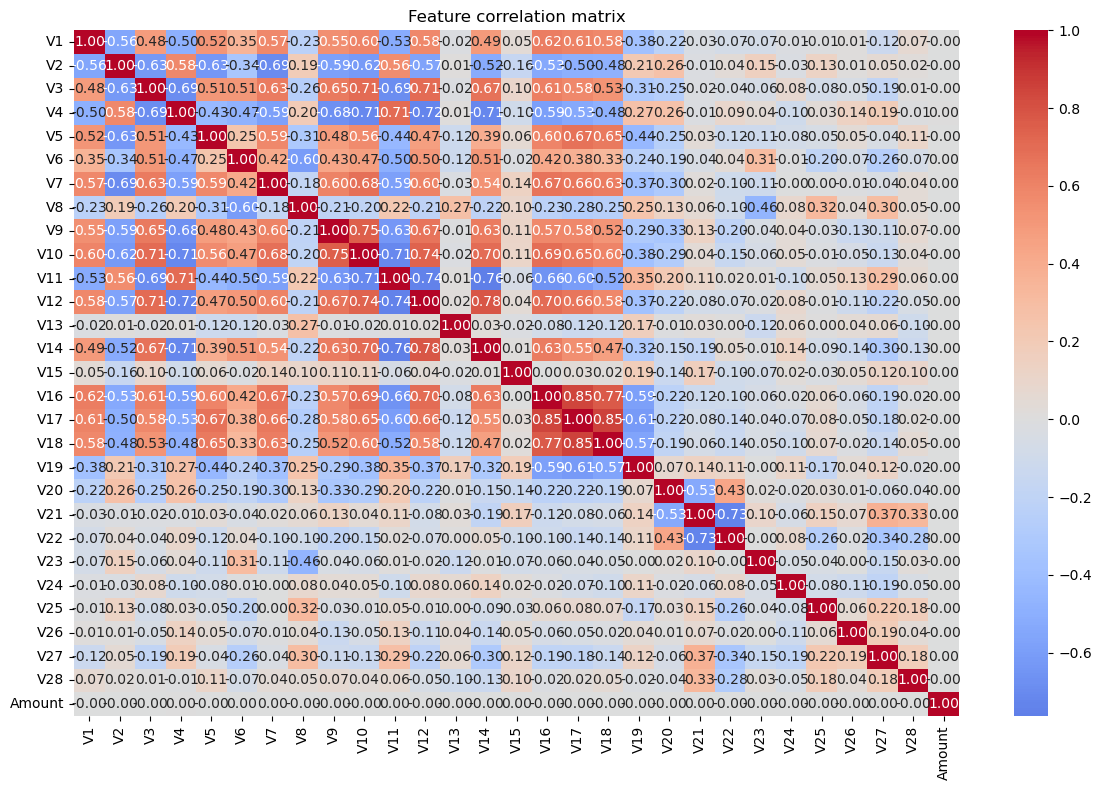

In [38]:
plt.figure(figsize=(12,8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature correlation matrix')
plt.tight_layout()
plt.show()

This code calculates the predicted probabilities for the positive class (fraud) from the Random Forest model, computes the False Positive Rate (FPR) and True Positive Rate (TPR) for different threshold values, and calculates the Area Under the Curve (AUC) for the ROC curve to evaluate the model's classification performance

In [41]:
y_pred_prob = rf_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

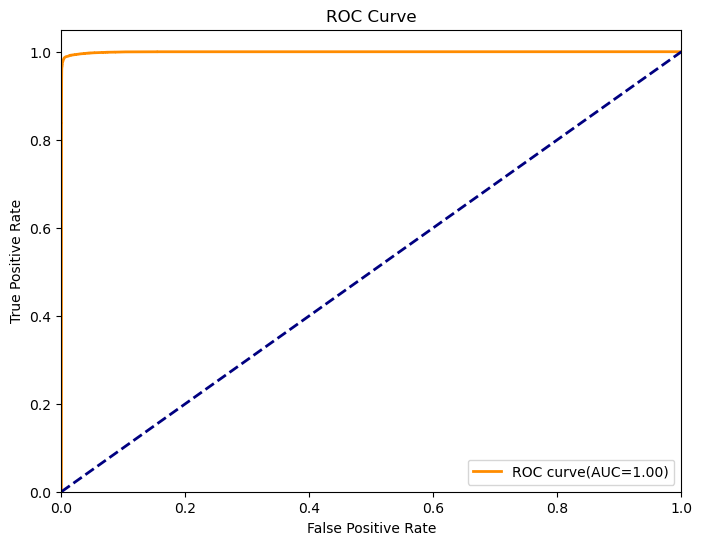

In [42]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve(AUC={roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()